In [87]:
import networkx as nx
import random
from scipy.stats import linregress

# df
import pandas as pd

# save
import json

# communities
in a network: “Groups of nodes that have a very large number of
connections among them and very few to nodes outside the group”.

# Project! 
Bipartite projection means that you have a bipartite network
with nodes of type V1 and V2, and you want to create a unipartite
network with only nodes of type V1 (or V2). <br>
we use a different criterion to give the projected edges
a weight, we establish a threshold, and drop the edges below this
minimum acceptable weight.
<br>
This means that there are going to be some users in your
bipartite user-movie network with a very high degree. These are
power users, people who watched everything. They are a problem:
under the rule we just gave to project the bipartite networks, you’ll
end up with all movies connected to each other. A hairball.


The easiest way to take this information into account is to perform
simple weighting

For each pair of nodes you identify the number
of common neighbors they have, and that’s the weight of the edge
– see Figure 23.5. In practice, you don’t simply require that movies
are connected if there is at least one person who has watched both of
them. You connect movies with a weighted link, and the weight is the
number of people who watched them both: wu,v = jNu \ Nvj. This
weighting scheme is similar to Common Neighbors in link prediction
(Section 20.2), and of course you can do a Jaccard correction by
normalizing it with the size of the union of the neighbor sets: wu,v =
jNu \ Nvj/jNu [ Nvj.
If you like to think in

# Vectorized projection

Some authors noticed that the simple count scheme has what they
call a “saturation” problem. As an illustration, consider the following
example: suppose you are an author and you collaborated with
another scientist on a new paper. The contribution of that new paper
to your similarity is not linear. If in your previous history you only
had a single other paper with this person, then the new paper is your
second collaboration. This is a strong contributor: it represents 50%
of your entire scientific output. If, instead, this was your hundredth
collaboration, this new paper only adds little to your connection
strength. Giving the same weight in these two different scenarios is
not a good proxy to estimate the similarity in the original network.

We can exploit edge weights to solve the saturation problem. Edge
weights are something that simple counting cannot handle easily,
and if you try to handle them by doing a weighted simple counting,
you probably end up doing something similar to what I present in
this section anyway. In this scenario, you don’t want to count each
common V2 neighbor equally. You need your adjacency matrix to
contain non-zero values different than one. For simplicity, I’m going
to make the following examples with a binary matrix anyway, also to
show that these techniques can handle this simpler scenario as well.

In [96]:
G = nx.read_edgelist("dataset_ubicomp2013_tips_final_subcompontents_removed.txt")
#G = nx.read_edgelist("dataset_ubicomp2013_tips_final.txt")

In [90]:
print(nx.density(G))

0.0004611300070664084


In [91]:
nodes_all[0:10]

['u145041',
 'u181455',
 'u266576',
 'u37026',
 'u55728',
 'u77584',
 'u68295',
 'u172476',
 'u17545',
 'u254587']

In [76]:
d = {'node', 'density'}
density_projection = pd.DataFrame(data=d)
# its super slow with it
density_projection_list = []

In [92]:
# Let's figure out which node is of which type
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[0]))
cols = sorted(list(nodes[1]))

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [78]:
# append together the nodes to check which of nodes will produce a bigger density
nodes_all = list(set(rows))

In [80]:
len(nodes_all)

2529

In [ ]:
# below code is running for a while, i think we should only focus on users, since = user visit more place = it has less weight

In [ ]:
# what about a random walk ? 

In [82]:
y = 0
density_projection_list = []
for i in nodes_all:
    #print(i)
    nodes = nx.algorithms.bipartite.basic.sets(G)
    rows = sorted(list(nodes[0]))
    cols = sorted(list(nodes[1]))
    if i in rows:
        nodes = rows
    else:
        nodes = cols
    T = nx.algorithms.bipartite.matrix.biadjacency_matrix(G, row_order = nodes)
    U = T * T.T
    U.setdiag(0)
    U.eliminate_zeros()
    Gd = nx.from_scipy_sparse_matrix(U)
    Gd = nx.relabel_nodes(Gd, {i: nodes[i] for i in range(len(nodes))})
    ###############x

    #density_projection = density_projection.append({'node': i, "density": nx.density(Gd)}, ignore_index=True)
    ################
    r = i,nx.density(Gd)
    density_projection_list.append(r)
    print(r)

    #print(nx.density(Gd))

('u145041', 0.005993763482839567)
('u181455', 0.005993763482839567)
('u266576', 0.005993763482839567)
('u37026', 0.005993763482839567)
('u55728', 0.005993763482839567)
('u77584', 0.005993763482839567)
('u68295', 0.005993763482839567)
('u172476', 0.005993763482839567)
('u17545', 0.005993763482839567)
('u254587', 0.005993763482839567)
('u243842', 0.005993763482839567)
('u40199', 0.005993763482839567)
('u263042', 0.005993763482839567)
('u65514', 0.005993763482839567)
('u68496', 0.005993763482839567)
('u59179', 0.005993763482839567)
('u30361', 0.005993763482839567)
('u57576', 0.005993763482839567)
('u7127', 0.005993763482839567)
('u30639', 0.005993763482839567)
('u143036', 0.005993763482839567)
('u230376', 0.005993763482839567)
('u23677', 0.005993763482839567)
('u50152', 0.005993763482839567)
('u260743', 0.005993763482839567)
('u2379', 0.005993763482839567)
('u52984', 0.005993763482839567)
('u255611', 0.005993763482839567)
('u48133', 0.005993763482839567)
('u98609', 0.005993763482839567)
(

('u41031', 0.005993763482839567)
('u52948', 0.005993763482839567)
('u265643', 0.005993763482839567)
('u71372', 0.005993763482839567)
('u42696', 0.005993763482839567)
('u46035', 0.005993763482839567)
('u125502', 0.005993763482839567)
('u132572', 0.005993763482839567)
('u41875', 0.005993763482839567)
('u2337', 0.005993763482839567)
('u1090', 0.005993763482839567)
('u49783', 0.005993763482839567)
('u1042', 0.005993763482839567)
('u128419', 0.005993763482839567)
('u16486', 0.005993763482839567)
('u34125', 0.005993763482839567)
('u71504', 0.005993763482839567)
('u45808', 0.005993763482839567)
('u93095', 0.005993763482839567)
('u8775', 0.005993763482839567)
('u238517', 0.005993763482839567)
('u55428', 0.005993763482839567)
('u64748', 0.005993763482839567)
('u65107', 0.005993763482839567)
('u64728', 0.005993763482839567)
('u174718', 0.005993763482839567)
('u56153', 0.005993763482839567)
('u83311', 0.005993763482839567)
('u88434', 0.005993763482839567)
('u47211', 0.005993763482839567)
('u20949

('u9161', 0.005993763482839567)
('u20653', 0.005993763482839567)
('u37565', 0.005993763482839567)
('u47769', 0.005993763482839567)
('u12068', 0.005993763482839567)
('u29832', 0.005993763482839567)
('u1488', 0.005993763482839567)
('u15193', 0.005993763482839567)
('u157966', 0.005993763482839567)
('u45720', 0.005993763482839567)
('u18556', 0.005993763482839567)
('u49177', 0.005993763482839567)
('u139190', 0.005993763482839567)
('u181505', 0.005993763482839567)
('u222298', 0.005993763482839567)
('u3125', 0.005993763482839567)
('u12623', 0.005993763482839567)
('u69553', 0.005993763482839567)
('u46440', 0.005993763482839567)
('u34559', 0.005993763482839567)
('u244247', 0.005993763482839567)
('u258400', 0.005993763482839567)
('u26013', 0.005993763482839567)
('u106855', 0.005993763482839567)
('u45830', 0.005993763482839567)
('u65308', 0.005993763482839567)
('u44213', 0.005993763482839567)
('u60367', 0.005993763482839567)
('u54561', 0.005993763482839567)
('u43440', 0.005993763482839567)
('u103

('u50913', 0.005993763482839567)
('u17193', 0.005993763482839567)
('u1664', 0.005993763482839567)
('u96969', 0.005993763482839567)
('u13953', 0.005993763482839567)
('u39105', 0.005993763482839567)
('u98753', 0.005993763482839567)
('u32021', 0.005993763482839567)
('u59456', 0.005993763482839567)
('u17574', 0.005993763482839567)
('u96231', 0.005993763482839567)
('u48', 0.005993763482839567)
('u148377', 0.005993763482839567)
('u16049', 0.005993763482839567)
('u23621', 0.005993763482839567)
('u146485', 0.005993763482839567)
('u78141', 0.005993763482839567)
('u31014', 0.005993763482839567)
('u59740', 0.005993763482839567)
('u59867', 0.005993763482839567)
('u49922', 0.005993763482839567)
('u154106', 0.005993763482839567)
('u51914', 0.005993763482839567)
('u59396', 0.005993763482839567)
('u206530', 0.005993763482839567)
('u23003', 0.005993763482839567)
('u249461', 0.005993763482839567)
('u217394', 0.005993763482839567)
('u48550', 0.005993763482839567)
('u14578', 0.005993763482839567)
('u77823

('u74111', 0.005993763482839567)
('u53581', 0.005993763482839567)
('u24511', 0.005993763482839567)
('u6266', 0.005993763482839567)
('u2856', 0.005993763482839567)
('u56881', 0.005993763482839567)
('u42937', 0.005993763482839567)
('u135804', 0.005993763482839567)
('u167073', 0.005993763482839567)
('u33600', 0.005993763482839567)
('u9390', 0.005993763482839567)
('u14964', 0.005993763482839567)
('u44739', 0.005993763482839567)
('u55150', 0.005993763482839567)
('u8146', 0.005993763482839567)
('u42265', 0.005993763482839567)
('u64678', 0.005993763482839567)
('u78325', 0.005993763482839567)
('u130681', 0.005993763482839567)
('u542', 0.005993763482839567)
('u21038', 0.005993763482839567)
('u13852', 0.005993763482839567)
('u94175', 0.005993763482839567)
('u257', 0.005993763482839567)
('u174450', 0.005993763482839567)
('u257641', 0.005993763482839567)
('u124076', 0.005993763482839567)
('u66148', 0.005993763482839567)
('u238303', 0.005993763482839567)
('u33989', 0.005993763482839567)
('u74383', 

('u117457', 0.005993763482839567)
('u193804', 0.005993763482839567)
('u6853', 0.005993763482839567)
('u61735', 0.005993763482839567)
('u87042', 0.005993763482839567)
('u32939', 0.005993763482839567)
('u50202', 0.005993763482839567)
('u49805', 0.005993763482839567)
('u38058', 0.005993763482839567)
('u29099', 0.005993763482839567)
('u140534', 0.005993763482839567)
('u256555', 0.005993763482839567)
('u71211', 0.005993763482839567)
('u128912', 0.005993763482839567)
('u72921', 0.005993763482839567)
('u49468', 0.005993763482839567)
('u81276', 0.005993763482839567)
('u12019', 0.005993763482839567)
('u9566', 0.005993763482839567)
('u68409', 0.005993763482839567)
('u17949', 0.005993763482839567)
('u21605', 0.005993763482839567)
('u87116', 0.005993763482839567)
('u15301', 0.005993763482839567)
('u96773', 0.005993763482839567)
('u8810', 0.005993763482839567)
('u69788', 0.005993763482839567)
('u8561', 0.005993763482839567)
('u61388', 0.005993763482839567)
('u2038', 0.005993763482839567)
('u24317',

('u53489', 0.005993763482839567)
('u12802', 0.005993763482839567)
('u237070', 0.005993763482839567)
('u6591', 0.005993763482839567)
('u26273', 0.005993763482839567)
('u178106', 0.005993763482839567)
('u138382', 0.005993763482839567)
('u105588', 0.005993763482839567)
('u138360', 0.005993763482839567)
('u100409', 0.005993763482839567)
('u263297', 0.005993763482839567)
('u43026', 0.005993763482839567)
('u47328', 0.005993763482839567)
('u15443', 0.005993763482839567)
('u258690', 0.005993763482839567)
('u52086', 0.005993763482839567)
('u107110', 0.005993763482839567)
('u12392', 0.005993763482839567)
('u223740', 0.005993763482839567)
('u31403', 0.005993763482839567)
('u27390', 0.005993763482839567)
('u38185', 0.005993763482839567)
('u31616', 0.005993763482839567)
('u195788', 0.005993763482839567)
('u31971', 0.005993763482839567)
('u39846', 0.005993763482839567)
('u11465', 0.005993763482839567)
('u4573', 0.005993763482839567)
('u4167', 0.005993763482839567)
('u39302', 0.005993763482839567)
('

('u19326', 0.005993763482839567)
('u76657', 0.005993763482839567)
('u9409', 0.005993763482839567)
('u70707', 0.005993763482839567)
('u1513', 0.005993763482839567)
('u17521', 0.005993763482839567)
('u14324', 0.005993763482839567)
('u52118', 0.005993763482839567)
('u105313', 0.005993763482839567)
('u36377', 0.005993763482839567)
('u93034', 0.005993763482839567)
('u20964', 0.005993763482839567)
('u71476', 0.005993763482839567)
('u256228', 0.005993763482839567)
('u50189', 0.005993763482839567)
('u231935', 0.005993763482839567)
('u9253', 0.005993763482839567)
('u31083', 0.005993763482839567)
('u196682', 0.005993763482839567)
('u27935', 0.005993763482839567)
('u227258', 0.005993763482839567)
('u170055', 0.005993763482839567)
('u181940', 0.005993763482839567)
('u104310', 0.005993763482839567)
('u2131', 0.005993763482839567)
('u49464', 0.005993763482839567)
('u98858', 0.005993763482839567)
('u12916', 0.005993763482839567)
('u55198', 0.005993763482839567)
('u118709', 0.005993763482839567)
('u17

('u62536', 0.005993763482839567)
('u66463', 0.005993763482839567)
('u91774', 0.005993763482839567)
('u143214', 0.005993763482839567)
('u43293', 0.005993763482839567)
('u215956', 0.005993763482839567)
('u16112', 0.005993763482839567)
('u5159', 0.005993763482839567)
('u2605', 0.005993763482839567)
('u36259', 0.005993763482839567)
('u8388', 0.005993763482839567)
('u5067', 0.005993763482839567)
('u27264', 0.005993763482839567)
('u25862', 0.005993763482839567)
('u66786', 0.005993763482839567)
('u59679', 0.005993763482839567)
('u68605', 0.005993763482839567)
('u130251', 0.005993763482839567)
('u65841', 0.005993763482839567)
('u31394', 0.005993763482839567)
('u23235', 0.005993763482839567)
('u3793', 0.005993763482839567)
('u97470', 0.005993763482839567)
('u45249', 0.005993763482839567)
('u79142', 0.005993763482839567)
('u233597', 0.005993763482839567)
('u222355', 0.005993763482839567)
('u23487', 0.005993763482839567)
('u68691', 0.005993763482839567)
('u147677', 0.005993763482839567)
('u36248'

('u208163', 0.005993763482839567)
('u23442', 0.005993763482839567)
('u34461', 0.005993763482839567)
('u90175', 0.005993763482839567)
('u40332', 0.005993763482839567)
('u28733', 0.005993763482839567)
('u11111', 0.005993763482839567)
('u152611', 0.005993763482839567)
('u243139', 0.005993763482839567)
('u48161', 0.005993763482839567)
('u117498', 0.005993763482839567)
('u38431', 0.005993763482839567)
('u99843', 0.005993763482839567)
('u19342', 0.005993763482839567)
('u39178', 0.005993763482839567)
('u170', 0.005993763482839567)
('u17939', 0.005993763482839567)
('u27367', 0.005993763482839567)
('u30792', 0.005993763482839567)
('u7067', 0.005993763482839567)
('u26201', 0.005993763482839567)
('u23793', 0.005993763482839567)
('u15691', 0.005993763482839567)
('u47463', 0.005993763482839567)
('u58', 0.005993763482839567)
('u9971', 0.005993763482839567)
('u2374', 0.005993763482839567)
('u154317', 0.005993763482839567)
('u84147', 0.005993763482839567)
('u144261', 0.005993763482839567)
('u251553', 

('u73449', 0.005993763482839567)
('u213351', 0.005993763482839567)
('u47260', 0.005993763482839567)
('u56533', 0.005993763482839567)
('u13052', 0.005993763482839567)
('u220970', 0.005993763482839567)
('u28470', 0.005993763482839567)
('u3256', 0.005993763482839567)
('u48997', 0.005993763482839567)
('u56656', 0.005993763482839567)
('u14862', 0.005993763482839567)
('u66858', 0.005993763482839567)
('u22259', 0.005993763482839567)
('u237512', 0.005993763482839567)
('u175163', 0.005993763482839567)
('u204657', 0.005993763482839567)
('u23524', 0.005993763482839567)
('u22283', 0.005993763482839567)
('u836', 0.005993763482839567)
('u645', 0.005993763482839567)
('u136450', 0.005993763482839567)
('u41955', 0.005993763482839567)
('u31304', 0.005993763482839567)
('u13904', 0.005993763482839567)
('u80487', 0.005993763482839567)
('u2209', 0.005993763482839567)
('u20377', 0.005993763482839567)
('u142669', 0.005993763482839567)
('u65309', 0.005993763482839567)
('u75858', 0.005993763482839567)
('u83158'

In [84]:
len(density_projection_list)

2529

In [88]:
with open('projection_using_simple_weights.txt', 'w') as convert_file:
     convert_file.write(json.dumps(density_projection_list))

In [24]:
if "v1001" in rows:
   nodes = rows
else:
   nodes = cols

In [12]:
# Let's get the bipartite adjacency matrix
T = nx.algorithms.bipartite.matrix.biadjacency_matrix(G, row_order = nodes)
#print(T)
#print(T.shape)

# If we multiply the bipartite adjacency matrix with its transpose we obtain the number of
# common ones between two rows, i.e. the number of common neighbors between the nodes.
U = T * T.T
#print(T.T)
#print(U)
print(U.shape)

# We set the diagonal to zero because we don't care about self loops
U.setdiag(0)
U.eliminate_zeros()

(2529, 2529)


In [13]:
# We get the projected graph back. We relabel to recover the original node IDs
G = nx.from_scipy_sparse_matrix(U)
G = nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

# Graph is super dense! 40%
print(nx.density(G))

0.005993763482839567


# Since simple one doesnt work lets check the other 

In [114]:
from sklearn.metrics import pairwise_distances
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [115]:
# We make the code from the previous question into its own function
def simple(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   U = T * T.T
   U.setdiag(0)
   U.eliminate_zeros()
   G = nx.from_scipy_sparse_matrix(U)
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

In [116]:
# We make functions to calculate alternative projections. The scheme is the same:
# calculate pairwise distances from the bipartite adjacency matrix and make them
# into similarity measures.
def cosine(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   # Since this is a distance, we take the inverse to make it into a similarity.
   # Maximum possible cosine distance is 1, so we take one minus it. If the two nodes
   # were identical, this measure equals to 1, if they were the maximum posible far
   # apart, this measure is zero.
   j_dist = 1.0 - pairwise_distances(T, metric = "cosine", n_jobs = -1)
   np.fill_diagonal(j_dist, 0)
   G = nx.from_numpy_matrix(j_dist)
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

def pearson(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   # Correlation distance maximum is 2 (corresponding to pearson correlation of -1).
   j_dist = (2.0 - pairwise_distances(T.todense(), metric = "correlation", n_jobs = -1)) / 2
   np.fill_diagonal(j_dist, 0)
   # We remove all edges between nodes negatively correlated with each other.
   j_dist[j_dist < .5] = 0
   G = nx.from_numpy_matrix(j_dist)
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

In [117]:
# Function calculating hyperbolic weights. basically, we just need to normalize
# the bipartite adjacency matrix by its degree, because each neighbo now counts
# not as one, but as one over the degree. Then the rest is as before.
def hyper(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   T /= T.sum(axis = 0)
   T = sparse.csr_matrix(T)
   U = T * T.T
   U.setdiag(0)
   U.eliminate_zeros()
   G = nx.from_scipy_sparse_matrix(U)
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

In [118]:
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[0]))
cols = sorted(list(nodes[1]))
if "u145041" in rows:
   nodes = rows
else:
   nodes = cols

In [147]:
G_simple = simple(G, nodes)
G_cosine = cosine(G, nodes)
G_pearson = pearson(G, nodes)
G_hyper = hyper(G, nodes)
all_edges = set(G_simple.edges) | set(G_cosine.edges) | set(G_pearson.edges) | set(G_hyper.edges)

In [161]:
geco = []

In [162]:
geco.append(G_simple)

In [164]:
geco[0].edges

EdgeView([('u10012', 'u98222'), ('u10012', 'u81276'), ('u10012', 'u80608'), ('u10012', 'u7750'), ('u10012', 'u73774'), ('u10012', 'u69179'), ('u10012', 'u49805'), ('u10012', 'u49177'), ('u10012', 'u47178'), ('u10012', 'u46585'), ('u10012', 'u39766'), ('u10012', 'u34355'), ('u10012', 'u28925'), ('u10012', 'u263042'), ('u10012', 'u215619'), ('u10012', 'u1541'), ('u10012', 'u1499'), ('u10012', 'u13999'), ('u100124', 'u30849'), ('u100124', 'u27588'), ('u100124', 'u24987'), ('u100124', 'u22056'), ('u100124', 'u17516'), ('u100124', 'u17148'), ('u10021', 'u6998'), ('u10021', 'u47061'), ('u10021', 'u46634'), ('u10021', 'u45774'), ('u10021', 'u36248'), ('u10021', 'u30820'), ('u10021', 'u27775'), ('u10021', 'u26924'), ('u10021', 'u23687'), ('u10021', 'u193804'), ('u10021', 'u159944'), ('u10021', 'u10760'), ('u100409', 'u98972'), ('u100409', 'u49177'), ('u100409', 'u30546'), ('u100409', 'u170055'), ('u10085', 'u6120'), ('u10085', 'u6083'), ('u10085', 'u542'), ('u10085', 'u47683'), ('u10085', 'u47

In [148]:
df = pd.DataFrame(data = [(e,
                           G_simple.edges[e]["weight"] if e in G_simple.edges else 0, 
                           G_cosine.edges[e]["weight"] if e in G_cosine.edges else 0, 
                           G_pearson.edges[e]["weight"] if e in G_pearson.edges else 0,
                          G_hyper.edges[e]["weight"] if e in G_pearson.edges else 0,)
                         for e in all_edges], columns = ("edge", "simple", "cosine", "pearson", "hyper"))

df.set_index("edge").corr()

,simple,cosine,pearson,hyper
simple,1.000000,-0.093403,-0.097967,0.206977
cosine,-0.093403,1.000000,0.979636,0.006667
pearson,-0.097967,0.979636,1.000000,0.010950
hyper,0.206977,0.006667,0.010950,1.000000


Perform a network projection of the bipartite network used for Exercise 23.1 using hyperbolic weights. Draw a scatter plot comparing hyperbolic and simple weights.

In [121]:
G_simple = simple(G, nodes)
G_hyper = hyper(G, nodes)
all_edges = set(G_simple.edges) | set(G_hyper.edges)

In [129]:
for e in G_simple.edges:
    print(e)

('u10012', 'u98222')
('u10012', 'u81276')
('u10012', 'u80608')
('u10012', 'u7750')
('u10012', 'u73774')
('u10012', 'u69179')
('u10012', 'u49805')
('u10012', 'u49177')
('u10012', 'u47178')
('u10012', 'u46585')
('u10012', 'u39766')
('u10012', 'u34355')
('u10012', 'u28925')
('u10012', 'u263042')
('u10012', 'u215619')
('u10012', 'u1541')
('u10012', 'u1499')
('u10012', 'u13999')
('u100124', 'u30849')
('u100124', 'u27588')
('u100124', 'u24987')
('u100124', 'u22056')
('u100124', 'u17516')
('u100124', 'u17148')
('u10021', 'u6998')
('u10021', 'u47061')
('u10021', 'u46634')
('u10021', 'u45774')
('u10021', 'u36248')
('u10021', 'u30820')
('u10021', 'u27775')
('u10021', 'u26924')
('u10021', 'u23687')
('u10021', 'u193804')
('u10021', 'u159944')
('u10021', 'u10760')
('u100409', 'u98972')
('u100409', 'u49177')
('u100409', 'u30546')
('u100409', 'u170055')
('u10085', 'u6120')
('u10085', 'u6083')
('u10085', 'u542')
('u10085', 'u47683')
('u10085', 'u47542')
('u10085', 'u132546')
('u10085', 'u105569')
('u1

('u121273', 'u51468')
('u121273', 'u29466')
('u121273', 'u2720')
('u121273', 'u242828')
('u121273', 'u242207')
('u121273', 'u23014')
('u121273', 'u22056')
('u121273', 'u15495')
('u121273', 'u54405')
('u121273', 'u231094')
('u121273', 'u169728')
('u121273', 'u153770')
('u121676', 'u49297')
('u121676', 'u196154')
('u12194', 'u82569')
('u12194', 'u78275')
('u12194', 'u65514')
('u12194', 'u63433')
('u12194', 'u54949')
('u12194', 'u5009')
('u12194', 'u49206')
('u12194', 'u36073')
('u12194', 'u29177')
('u12194', 'u27404')
('u12194', 'u25651')
('u12194', 'u239948')
('u12194', 'u199862')
('u12194', 'u199027')
('u12194', 'u186838')
('u12194', 'u16654')
('u12194', 'u16602')
('u12194', 'u1317')
('u12194', 'u214268')
('u122003', 'u7008')
('u122003', 'u26857')
('u122003', 'u18542')
('u122003', 'u1349')
('u122003', 'u33390')
('u122003', 'u24987')
('u122003', 'u184814')
('u122027', 'u231094')
('u122027', 'u89566')
('u122027', 'u8120')
('u122027', 'u192043')
('u122027', 'u82569')
('u122027', 'u56881')

('u135368', 'u219170')
('u135425', 'u69179')
('u135425', 'u242207')
('u135425', 'u163242')
('u135425', 'u87196')
('u135425', 'u77887')
('u135425', 'u65841')
('u135425', 'u49297')
('u135425', 'u36721')
('u135690', 'u89566')
('u135690', 'u52713')
('u135690', 'u28450')
('u135690', 'u227342')
('u135690', 'u19387')
('u135690', 'u31242')
('u135804', 'u48208')
('u135804', 'u47178')
('u135804', 'u209553')
('u135804', 'u264722')
('u135804', 'u21380')
('u135804', 'u20706')
('u135804', 'u196154')
('u135804', 'u97287')
('u135804', 'u72')
('u135804', 'u14566')
('u135804', 'u52226')
('u135804', 'u155760')
('u135978', 'u756')
('u135978', 'u55238')
('u135978', 'u30961')
('u135978', 'u30502')
('u135978', 'u29052')
('u135978', 'u25807')
('u135978', 'u23420')
('u135978', 'u21452')
('u135978', 'u20377')
('u135978', 'u196154')
('u136058', 'u54073')
('u136058', 'u82569')
('u136058', 'u32518')
('u136058', 'u17454')
('u136058', 'u47683')
('u136058', 'u157966')
('u13618', 'u50489')
('u1363', 'u48083')
('u1363'

('u158177', 'u32824')
('u158275', 'u52563')
('u158275', 'u177297')
('u158275', 'u51914')
('u158275', 'u38185')
('u15828', 'u59612')
('u15828', 'u18799')
('u15830', 'u23524')
('u15830', 'u196154')
('u15830', 'u17435')
('u158442', 'u9409')
('u158442', 'u2720')
('u158446', 'u84797')
('u158446', 'u62603')
('u158446', 'u2839')
('u1585', 'u84141')
('u1585', 'u72')
('u1585', 'u57056')
('u1585', 'u25807')
('u1585', 'u25041')
('u1585', 'u2448')
('u1585', 'u196154')
('u1585', 'u16602')
('u1585', 'u80104')
('u1585', 'u29831')
('u1585', 'u173021')
('u158827', 'u953')
('u158827', 'u72')
('u158827', 'u5663')
('u158827', 'u30849')
('u158827', 'u25094')
('u158827', 'u40642')
('u158827', 'u29301')
('u15912', 'u82569')
('u15912', 'u68')
('u15912', 'u66854')
('u15912', 'u38448')
('u15912', 'u34460')
('u15912', 'u257034')
('u15925', 'u66463')
('u15947', 'u9685')
('u15947', 'u39231')
('u15947', 'u9390')
('u15947', 'u8466')
('u15947', 'u80608')
('u15947', 'u7366')
('u15947', 'u44555')
('u15947', 'u2442')
('

('u187044', 'u556')
('u187044', 'u206777')
('u1878', 'u82569')
('u1878', 'u7378')
('u1878', 'u5021')
('u1878', 'u4663')
('u1878', 'u42214')
('u1878', 'u26015')
('u1878', 'u2448')
('u1878', 'u52312')
('u18789', 'u90026')
('u18789', 'u78275')
('u187984', 'u82113')
('u187984', 'u72')
('u187984', 'u68605')
('u187984', 'u62764')
('u187984', 'u52206')
('u187984', 'u25807')
('u187984', 'u237785')
('u187984', 'u2358')
('u187984', 'u19335')
('u18799', 'u87461')
('u18799', 'u27404')
('u18799', 'u55222')
('u18799', 'u542')
('u18799', 'u59612')
('u18799', 'u25041')
('u18799', 'u9961')
('u18799', 'u80104')
('u18799', 'u27648')
('u18799', 'u19066')
('u18799', 'u54471')
('u18799', 'u24506')
('u18799', 'u19997')
('u188400', 'u71553')
('u188400', 'u22595')
('u188400', 'u224128')
('u188400', 'u82569')
('u188400', 'u8146')
('u188400', 'u72')
('u188400', 'u616')
('u188400', 'u4356')
('u188400', 'u27367')
('u188400', 'u26202')
('u188400', 'u24772')
('u188400', 'u54289')
('u188400', 'u5503')
('u18863', 'u63

('u208452', 'u34460')
('u208452', 'u27404')
('u208452', 'u72')
('u208452', 'u6191')
('u208452', 'u50152')
('u208452', 'u223170')
('u208592', 'u69153')
('u208636', 'u56867')
('u208636', 'u24873')
('u208636', 'u4463')
('u208636', 'u216629')
('u209173', 'u76559')
('u209173', 'u72')
('u209173', 'u49343')
('u209468', 'u96773')
('u209468', 'u69216')
('u209468', 'u224128')
('u20949', 'u9431')
('u20949', 'u54949')
('u20949', 'u5254')
('u20949', 'u50620')
('u20949', 'u39279')
('u20949', 'u34281')
('u20949', 'u25438')
('u20949', 'u24296')
('u209553', 'u29831')
('u209553', 'u850')
('u209553', 'u6103')
('u209553', 'u31971')
('u209553', 'u50152')
('u209553', 'u45210')
('u209553', 'u82569')
('u209553', 'u227224')
('u209553', 'u89566')
('u209553', 'u8466')
('u209553', 'u7378')
('u209553', 'u6359')
('u209553', 'u33583')
('u209553', 'u32855')
('u209553', 'u24873')
('u209553', 'u50456')
('u209553', 'u22056')
('u20964', 'u9962')
('u20964', 'u7067')
('u20964', 'u3744')
('u20964', 'u264057')
('u20964', 'u2

('u232655', 'u7224')
('u232655', 'u72')
('u232655', 'u7076')
('u232655', 'u64130')
('u232655', 'u57576')
('u232655', 'u47699')
('u232655', 'u42404')
('u232655', 'u36202')
('u232655', 'u34125')
('u232655', 'u29949')
('u232655', 'u29177')
('u232655', 'u25807')
('u232655', 'u25094')
('u23268', 'u6998')
('u23268', 'u34460')
('u233025', 'u9962')
('u233025', 'u6709')
('u233025', 'u57971')
('u233025', 'u47178')
('u233025', 'u36865')
('u233025', 'u80608')
('u233025', 'u54289')
('u233025', 'u50730')
('u233025', 'u48083')
('u233025', 'u38956')
('u233025', 'u261848')
('u2337', 'u98568')
('u2337', 'u86517')
('u23408', 'u40332')
('u23408', 'u28925')
('u23408', 'u259370')
('u23408', 'u71372')
('u23408', 'u66148')
('u23408', 'u60211')
('u23408', 'u41558')
('u23408', 'u238035')
('u234113', 'u40642')
('u23420', 'u756')
('u23420', 'u55238')
('u23420', 'u30961')
('u23420', 'u30502')
('u23420', 'u29052')
('u23420', 'u25807')
('u23420', 'u9962')
('u23420', 'u79988')
('u23420', 'u6998')
('u23420', 'u59796')

('u2637', 'u93386')
('u2637', 'u8132')
('u2637', 'u60486')
('u2637', 'u5067')
('u2637', 'u44431')
('u264033', 'u43293')
('u264057', 'u82569')
('u264057', 'u69093')
('u264057', 'u616')
('u264057', 'u47991')
('u264057', 'u429')
('u264057', 'u32738')
('u264057', 'u29177')
('u264057', 'u756')
('u264057', 'u64748')
('u264057', 'u57056')
('u264057', 'u542')
('u264057', 'u48639')
('u264057', 'u40518')
('u264057', 'u31240')
('u264057', 'u7067')
('u264057', 'u3744')
('u264057', 'u9686')
('u264057', 'u72')
('u264057', 'u6263')
('u264057', 'u58020')
('u264057', 'u5183')
('u264057', 'u48083')
('u264057', 'u41778')
('u264057', 'u39800')
('u264057', 'u32880')
('u264057', 'u96795')
('u264057', 'u7378')
('u264057', 'u7293')
('u264057', 'u47859')
('u264057', 'u42667')
('u264057', 'u3897')
('u264057', 'u30546')
('u264953', 'u9549')
('u264953', 'u68409')
('u264953', 'u32744')
('u265196', 'u334')
('u26539', 'u82569')
('u26539', 'u6243')
('u26539', 'u60601')
('u265643', 'u83946')
('u265643', 'u82569')
('u2

('u34119', 'u45573')
('u34119', 'u82819')
('u34125', 'u89566')
('u34125', 'u68409')
('u34125', 'u92759')
('u34125', 'u82569')
('u34125', 'u81157')
('u34125', 'u7224')
('u34125', 'u72')
('u34125', 'u7076')
('u34125', 'u64130')
('u34125', 'u57576')
('u34125', 'u47699')
('u34125', 'u42404')
('u34125', 'u36202')
('u34131', 'u953')
('u34131', 'u49714')
('u34138', 'u80104')
('u34138', 'u5566')
('u34138', 'u48224')
('u34138', 'u9962')
('u34138', 'u65695')
('u34138', 'u47769')
('u34138', 'u60284')
('u34138', 'u4919')
('u34138', 'u93642')
('u34248', 'u60742')
('u34281', 'u9431')
('u34281', 'u54949')
('u34281', 'u5254')
('u34281', 'u50620')
('u34281', 'u39279')
('u34281', 'u58')
('u34281', 'u6243')
('u34281', 'u47859')
('u34281', 'u752')
('u34281', 'u6411')
('u34281', 'u47211')
('u34355', 'u98222')
('u34355', 'u81276')
('u34355', 'u80608')
('u34355', 'u7750')
('u34355', 'u73774')
('u34355', 'u69179')
('u34355', 'u49805')
('u34355', 'u49177')
('u34355', 'u47178')
('u34355', 'u46585')
('u34355', '

('u50202', 'u68155')
('u50202', 'u57056')
('u50202', 'u8466')
('u50202', 'u78275')
('u50202', 'u72')
('u5021', 'u63353')
('u5021', 'u50489')
('u5021', 'u72')
('u5021', 'u82569')
('u5021', 'u7378')
('u5021', 'u5503')
('u50218', 'u78275')
('u50246', 'u7757')
('u50246', 'u953')
('u50246', 'u50620')
('u50246', 'u82569')
('u50246', 'u65107')
('u50246', 'u59612')
('u50246', 'u85270')
('u50246', 'u50664')
('u50246', 'u7461')
('u50246', 'u77584')
('u50343', 'u953')
('u50343', 'u54561')
('u50377', 'u8561')
('u50377', 'u53545')
('u50377', 'u616')
('u50377', 'u57437')
('u50377', 'u82569')
('u50377', 'u72')
('u50377', 'u78157')
('u50377', 'u50489')
('u50423', 'u71605')
('u50489', 'u88870')
('u50489', 'u86993')
('u50489', 'u6245')
('u50489', 'u6120')
('u50489', 'u5390')
('u50489', 'u8466')
('u50489', 'u63386')
('u50489', 'u63353')
('u50489', 'u9962')
('u50489', 'u79988')
('u50489', 'u6998')
('u50489', 'u59796')
('u50489', 'u5183')
('u50489', 'u56533')
('u50489', 'u72')
('u50489', 'u5663')
('u50489'

('u73774', 'u83538')
('u73774', 'u82569')
('u73774', 'u756')
('u7378', 'u89566')
('u7378', 'u8466')
('u7378', 'u86519')
('u7378', 'u96795')
('u7378', 'u850')
('u7378', 'u82569')
('u738', 'u90814')
('u7395', 'u943')
('u73961', 'u98138')
('u73961', 'u79352')
('u74203', 'u82569')
('u74203', 'u79142')
('u7461', 'u78099')
('u7487', 'u75767')
('u7487', 'u77887')
('u7487', 'u89566')
('u7487', 'u88996')
('u7487', 'u82569')
('u75177', 'u88996')
('u752', 'u89566')
('u75584', 'u90894')
('u75584', 'u8997')
('u756', 'u82569')
('u75708', 'u79452')
('u75708', 'u8466')
('u75708', 'u86519')
('u75708', 'u96156')
('u75708', 'u82569')
('u75767', 'u82569')
('u75858', 'u98858')
('u75858', 'u90026')
('u75858', 'u8210')
('u75858', 'u99843')
('u7599', 'u8466')
('u7599', 'u953')
('u7599', 'u99')
('u7599', 'u9686')
('u7599', 'u96231')
('u7599', 'u77968')
('u7599', 'u943')
('u7599', 'u82569')
('u7599', 'u78275')
('u7599', 'u9962')
('u7599', 'u8959')
('u76327', 'u9')
('u76327', 'u80608')
('u76531', 'u9769')
('u765

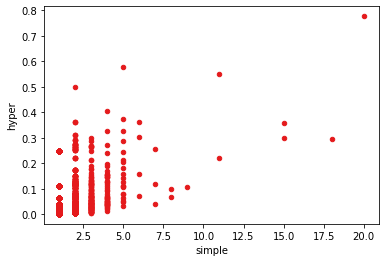

In [122]:
df = pd.DataFrame(data = [(e,
                           G_simple.edges[e]["weight"] if e in G_simple.edges else 0, 
                           G_hyper.edges[e]["weight"] if e in G_hyper.edges else 0)
                         for e in all_edges], columns = ("edge", "simple", "hyper"))

df.plot(kind = "scatter", x = "simple", y = "hyper", color = "#e41a1c")
plt.show()

# Backbonening

Plot the CCDF edge weight distribution of this network. Calculate its average and standard deviation. NOTE: this is a directed graph!
(Original data source: Coscia, Michele, and Frank MH Neffke. "Network backboning with noisy data." 2017 IEEE 33rd International Conference on Data Engineering (ICDE). IEEE, 2017.)

In [134]:
from collections import Counter

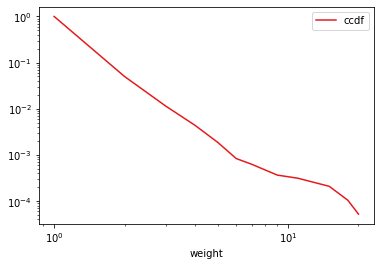

In [138]:
edgeweights = list(dict(nx.get_edge_attributes(G_simple, "weight")).values())
# Let's use our degree CCDF code for the edge weights
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

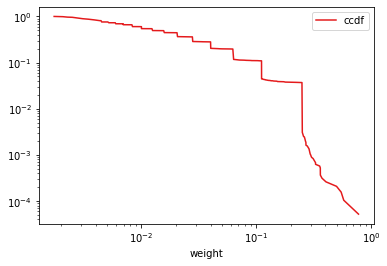

In [139]:
edgeweights = list(dict(nx.get_edge_attributes(G_hyper, "weight")).values())
# Let's use our degree CCDF code for the edge weights
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

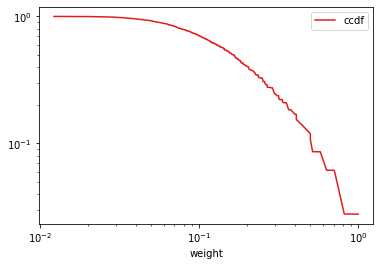

In [140]:
edgeweights = list(dict(nx.get_edge_attributes(G_cosine, "weight")).values())
# Let's use our degree CCDF code for the edge weights
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

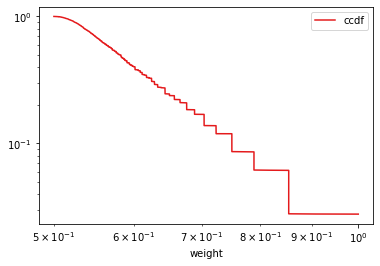

In [141]:
edgeweights = list(dict(nx.get_edge_attributes(G_pearson, "weight")).values())
# Let's use our degree CCDF code for the edge weights
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

What is the minimum statistically significant edge weight (the one two standard deviations higher than the average) of the network from Exercise 24.1? How many edges would you keep if you were to set that as the threshold?
(Original data source: Coscia, Michele, and Frank MH Neffke. "Network backboning with noisy data." 2017 IEEE 33rd International Conference on Data Engineering (ICDE). IEEE, 2017.)

In [143]:
# Calculate average & stdev
edgeweights = np.array(edgeweights)
avg = np.mean(edgeweights)
std = np.std(edgeweights)
# Minimum threshold weight
threshold = avg + (2 * std)
print("Minimum threshold: %1.1f" % threshold)

Minimum threshold: 0.8


In [145]:
# Counting edges above the threshold
edges_kept = 0
for e in G_pearson.edges(data = True):
   if e[2]["weight"] >= threshold:
      edges_kept += 1

print("Edges kept: %d" % edges_kept)
# Not that many!

Edges kept: 1176


In [146]:
len(G_pearson.edges)

19125